In [ ]:
!pip install torch torchvision
!pip install opencv-python-headless
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install -U 'git+https://github.com/ultralytics/yolov5'
!pip install kaggle
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os

os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded['kaggle.json'])

os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!kaggle datasets download -d mayurmahurkar/stanford-car-body-type-data -p /content/stanford-car-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/mayurmahurkar/stanford-car-body-type-data
License(s): other


In [ ]:
!ls /content/stanford-car-dataset

data_info.txt  stanford_cars_type  stanford_cars_type.csv


In [ ]:
import pandas as pd

data_path = '/content/stanford-car-dataset'
annotations = pd.read_csv(f'{data_path}/stanford_cars_type.csv')

print(annotations.head())


   Unnamed: 0  file_name  car_code                             car_name  \
0           0  00001.jpg        14                  Audi TTS Coupe 2012   
1           1  00002.jpg         3                  Acura TL Sedan 2012   
2           2  00003.jpg        91           Dodge Dakota Club Cab 2007   
3           3  00004.jpg       134     Hyundai Sonata Hybrid Sedan 2012   
4           4  00005.jpg       106  Ford F-450 Super Duty Crew Cab 2012   

     brand car_type                                   new_filename  
0     Audi    Coupe                  00001_Audi TTS Coupe 2012.jpg  
1    Acura    Sedan                  00002_Acura TL Sedan 2012.jpg  
2    Dodge      Cab           00003_Dodge Dakota Club Cab 2007.jpg  
3  Hyundai    Sedan     00004_Hyundai Sonata Hybrid Sedan 2012.jpg  
4     Ford      Cab  00005_Ford F-450 Super Duty Crew Cab 2012.jpg  


In [ ]:
import os

dataset_path = '/content/stanford-car-dataset'
print(os.listdir(dataset_path))


['data_info.txt', 'stanford_cars_type.csv', 'stanford_cars_type']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

dataset_path = '/content/stanford-car-dataset/stanford_cars_type'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 6520 images belonging to 10 classes.
Found 1624 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.3766 - loss: 1.8171 - val_accuracy: 0.5647 - val_loss: 1.2518
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.5410 - loss: 1.3297 - val_accuracy: 0.5776 - val_loss: 1.1826
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.5691 - loss: 1.2191 - val_accuracy: 0.6053 - val_loss: 1.1106
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.5914 - loss: 1.1350 - val_accuracy: 0.6145 - val_loss: 1.0851
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.6148 - loss: 1.0808 - val_accuracy: 0.6219 - val_loss: 1.0452
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.6325 - loss: 1.0291 - val_accuracy: 0.6195 - val_loss: 1.0409
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - accuracy: 0.6612 - loss: 0.9805 - val_accuracy: 0.6324 - val_loss: 1.0172
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.6676 - loss: 0.9356 - val_accu

In [ ]:
# Save the trained model to disk
MODEL_PATH = "car_bodytype_model.h5"
model.save(MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")


Model saved to car_bodytype_model.h5


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv('/content/stanford-car-dataset/stanford_cars_type.csv')

# Optional: Define size mappings based on body type
size_map = {
    'SUV': 'Large',
    'Sedan': 'Medium',
    'Hatchback': 'Small',
    'Coupe': 'Medium',
    'Convertible': 'Small',
    'Minivan': 'Large',
    'Truck': 'Large',
    'Cab': 'Small',
    'Other': 'Medium'
}

# Build the dictionary
car_info = {}
for _, row in df.iterrows():
    name = row['car_name']
    body_type = row['car_type']
    size = size_map.get(body_type, 'Medium')  # default to Medium if type not found
    car_info[name] = {
        'size': size,
        'body_type': body_type
    }

# Preview first few entries
for car, info in list(car_info.items())[:5]:
    print(f"{car}: {info}")


Audi TTS Coupe 2012: {'size': 'Medium', 'body_type': 'Coupe'}
Acura TL Sedan 2012: {'size': 'Medium', 'body_type': 'Sedan'}
Dodge Dakota Club Cab 2007: {'size': 'Small', 'body_type': 'Cab'}
Hyundai Sonata Hybrid Sedan 2012: {'size': 'Medium', 'body_type': 'Sedan'}
Ford F-450 Super Duty Crew Cab 2012: {'size': 'Small', 'body_type': 'Cab'}


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_car(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    predictions = model.predict(img_array)
    predicted_class = train_data.class_indices
    class_names = list(predicted_class.keys())

    print("Predicted Car:", class_names[np.argmax(predictions)])


In [ ]:
def get_car_info(class_name):
    info = car_info.get(class_name, {"size": "Unknown", "body_type": "Unknown"})
    return info

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Constants
IMG_SIZE = (224, 224)
MODEL_PATH = "car_bodytype_model.h5"
DATASET_PATH = '/content/stanford-car-dataset/stanford_cars_type'

# Save the model after training
# model.save(MODEL_PATH)

# Load the model
model = tf.keras.models.load_model(MODEL_PATH)

# Load class indices
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
temp_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical'
)
class_names = list(temp_data.class_indices.keys())

# Load car metadata
import pandas as pd
df = pd.read_csv('/content/stanford-car-dataset/stanford_cars_type.csv')
size_map = {
    'SUV': 'Large',
    'Sedan': 'Medium',
    'Hatchback': 'Small',
    'Coupe': 'Medium',
    'Convertible': 'Small',
    'Minivan': 'Large',
    'Truck': 'Large',
    'Cab': 'Small',
    'Other': 'Medium'
}
car_info = {
    row['car_name']: {
        'size': size_map.get(row['car_type'], 'Medium'),
        'body_type': row['car_type']
    } for _, row in df.iterrows()
}

# Classification function
def classify_car_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]

    info = car_info.get(predicted_class, {"size": "Unknown", "body_type": "Unknown"})
    print(f"Predicted Car: {predicted_class}")
    print(f"Body Type: {info['body_type']}")
    print(f"Size: {info['size']}")

    return predicted_class, info

classify_car_image('/content/stanford-car-dataset/stanford_cars_type/Coupe/00029_Spyker C8 Coupe 2009.jpg')


Found 8144 images belonging to 10 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Car: Coupe
Body Type: Unknown
Size: Unknown


('Coupe', {'size': 'Unknown', 'body_type': 'Unknown'})

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import pandas as pd
import os

# Load trained model
MODEL_PATH = 'car_bodytype_model.h5'
model = tf.keras.models.load_model(MODEL_PATH)

# Class names (load from dataset)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (224, 224)
datagen = ImageDataGenerator(rescale=1./255)
temp_data = datagen.flow_from_directory(
    '/content/stanford-car-dataset/stanford_cars_type',
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical'
)
class_names = list(temp_data.class_indices.keys())

# Car info
df = pd.read_csv('/content/stanford-car-dataset/stanford_cars_type.csv')
size_map = {
    'SUV': 'Large',
    'Sedan': 'Medium',
    'Hatchback': 'Small',
    'Coupe': 'Medium',
    'Convertible': 'Small',
    'Minivan': 'Large',
    'Truck': 'Large',
    'Cab': 'Small',
    'Other': 'Medium'
}
car_info = {
    row['car_name']: {
        'size': size_map.get(row['car_type'], 'Medium'),
        'body_type': row['car_type']
    } for _, row in df.iterrows()
}

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Classify image
def classify_uploaded_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]

    print(f"\nPredicted Car Type: {predicted_class}")

    return predicted_class, info

# Run classification
classify_uploaded_image(img_path)


Found 8144 images belonging to 10 classes.


Saving Screenshot 2025-04-15 095039.png to Screenshot 2025-04-15 095039.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Predicted Car Type: SUV


('SUV', {'size': 'Small', 'body_type': 'Cab'})

In [ ]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Classify image
def classify_uploaded_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]

    print(f"\nPredicted Car Type: {predicted_class}")

    return predicted_class, info

# Run classification
classify_uploaded_image(img_path)


Saving Screenshot 2025-04-15 100117.png to Screenshot 2025-04-15 100117.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

Predicted Car Type: Coupe


('Coupe', {'size': 'Unknown', 'body_type': 'Unknown'})

In [ ]:
files.download(MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 118MB/s] 


Found 8144 images belonging to 10 classes.


Saving Screenshot 2025-04-15 095636.png to Screenshot 2025-04-15 095636.png

0: 352x640 1 car, 753.0ms
Speed: 14.6ms preprocess, 753.0ms inference, 37.2ms postprocess per image at shape (1, 3, 352, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


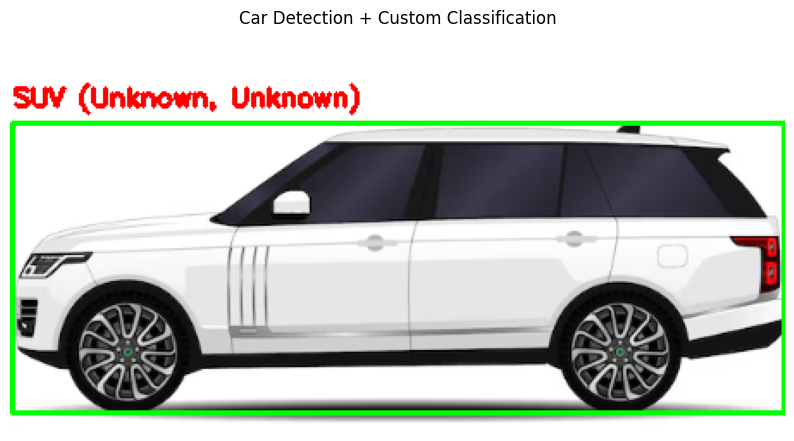

In [ ]:
import torch
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO (for detection only)
yolo = YOLO('yolov5s.pt')

# Load your custom classification model
model = tf.keras.models.load_model('car_bodytype_model.h5')

# Load class names (from your dataset)
datagen = ImageDataGenerator(rescale=1./255)
temp_data = datagen.flow_from_directory(
    '/content/stanford-car-dataset/stanford_cars_type',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical'
)
class_names = list(temp_data.class_indices.keys())

# Load car metadata (size/body type mappings)
car_info = {
    row['car_name']: {
        'size': size_map.get(row['car_type'], 'Medium'),
        'body_type': row['car_type']
    } for _, row in df.iterrows()
}

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Run YOLO detection (get bounding boxes)
results = yolo(img_rgb)

# Process each detection
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

        # Crop the detected region (YOLO returns all objects)
        crop = img_rgb[y1:y2, x1:x2]

        # Preprocess for YOUR model
        cropped_img = cv2.resize(crop, (224, 224))
        img_array = image.img_to_array(cropped_img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Classify using YOUR model
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]
        info = car_info.get(predicted_class, {"size": "Unknown", "body_type": "Unknown"})

        # Draw bounding box + label (from your model)
        label = f"{predicted_class} ({info['body_type']}, {info['size']})"
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, label, (x1, y1 - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Car Detection + Custom Classification")
plt.show()